<a href="https://colab.research.google.com/github/RDLL/curso_mineria_de_datos/blob/main/Tarea3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# I. Preprocesamiento de Datos
## Tarea 3 
## Análisis de Correlación

In [56]:
#Solo en caso de error
pip install pingouin

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.6/198.6 kB 4.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7029 sha256=0b58036c28593d03ba5117ef49293597ec71726fbcffc58fce18ae3b966b6a90
  Stored in directory: /root/.cache/pip/wheels/3d/fe/b0/27a9892da57472e538c7452a721a9cf463cc03cf7379889266
Successfully built littleutils


In [57]:
#Tratamiento de datos
#====================================
import pandas as pd
import numpy as np

#Graficos
#====================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

#Preprocesado y análisis
#====================================
import statsmodels.api as sm
import pingouin as pg
from scipy import stats
from scipy.stats import pearsonr

plt.style.use('ggplot')

In [60]:
df = pd.read_csv('https://raw.githubusercontent.com/RDLL/curso_mineria_de_datos/main/2021_10_EstMeteorologica.csv', sep=';',decimal = ',')
df.head(n=10)

,No,Date,Time,ColdJunc0,PowerVolt,PowerKind,WS(ave),WD(ave),WS(max),WD(most),WS(inst_m),WD(inst_m),Max_time,Solar_rad,TEMP,Humidity,Rainfall,Bar_press.,Soil_temp
0,92793,1/10/2021,0:00:00,22.6,13.0,2,0.4,19,0.9,NE,1.9,43,23:50:41,0.0,22.5,82.39,0.0,1000.0,0.0
1,92794,1/10/2021,0:10:00,22.5,13.0,2,1.0,131,1.0,ESE,4.3,161,0:04:57,0.0,22.3,84.09,0.0,1000.0,0.0
2,92795,1/10/2021,0:20:00,22.5,13.0,2,0.8,166,1.0,ESE,3.7,145,0:13:00,0.0,22.7,81.99,0.0,1000.0,0.0
3,92796,1/10/2021,0:30:00,22.5,13.0,2,0.7,205,0.8,WSW,3.1,160,0:25:55,0.0,22.2,84.29,0.0,1000.0,0.0
4,92797,1/10/2021,0:40:00,22.5,12.9,2,0.6,134,0.7,E,4.3,121,0:35:35,0.0,21.8,87.90,0.0,999.7,0.0
5,92798,1/10/2021,0:50:00,22.4,13.0,2,0.2,124,0.6,SSE,1.9,51,0:47:12,0.0,21.6,89.40,0.0,999.6,0.0
6,92799,1/10/2021,1:00:00,22.2,13.0,2,0.8,7,0.8,NNE,2.5,54,0:51:29,0.0,21.5,90.20,0.0,999.2,0.0
7,92800,1/10/2021,1:10:00,22.1,12.9,2,0.9,52,0.9,NE,5.5,291,1:09:59,0.0,21.4,91.10,0.0,999.1,0.0
8,92801,1/10/2021,1:20:00,22.0,12.9,2,0.9,206,1.1,SSW,5.5,215,1:11:09,0.0,21.2,92.60,0.0,999.1,0.0
9,92802,1/10/2021,1:30:00,21.9,13.0,2,0.6,152,0.9,SE,3.7,145,1:20:30,0.0,21.2,93.60,0.0,999.1,0.0


In [61]:
sensor_EM = ["TEMP","Humidity","Solar_rad","Bar_press."]
subdatos = df[sensor_EM].copy()

In [62]:
subdatos 

,TEMP,Humidity,Solar_rad,Bar_press.
0,22.5,82.39,0.0,1000.0
1,22.3,84.09,0.0,1000.0
2,22.7,81.99,0.0,1000.0
3,22.2,84.29,0.0,1000.0
4,21.8,87.90,0.0,999.7
...,...,...,...,...
4459,22.7,88.70,0.0,1002.7
4460,22.7,88.80,0.0,1002.7
4461,22.9,88.80,0.0,1003.1
4462,22.8,88.40,0.0,1003.1


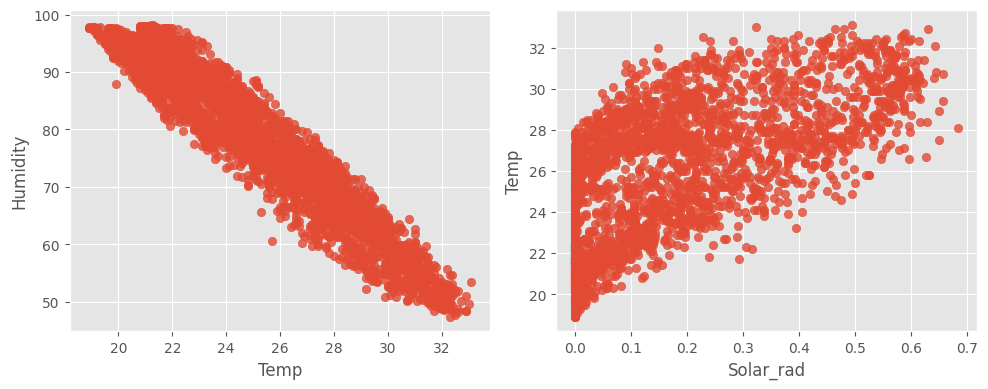

In [63]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

axs[0].scatter(x=subdatos.TEMP,y=subdatos.Humidity,alpha=0.8)
axs[0].set_xlabel('Temp')
axs[0].set_ylabel('Humidity')

axs[1].scatter(x=subdatos.Solar_rad,y=subdatos.TEMP,alpha=0.8)
axs[1].set_xlabel('Solar_rad')
axs[1].set_ylabel('Temp')


plt.tight_layout();

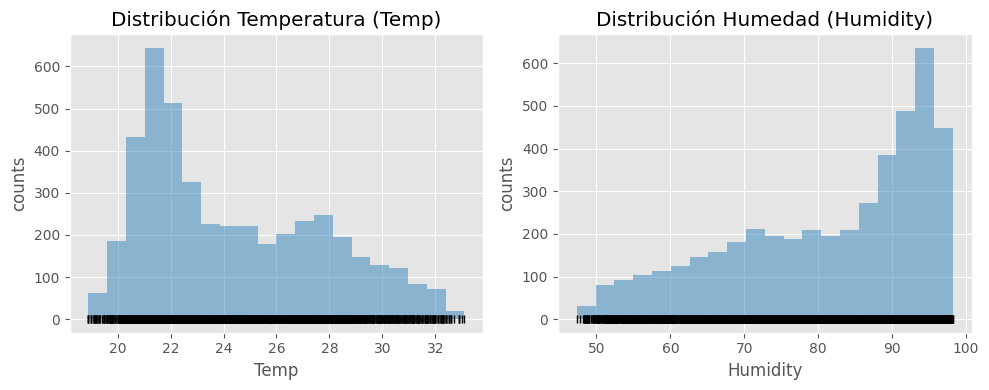

In [64]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

axs[0].hist(x=subdatos.TEMP, bins=20, color="#3182bd", alpha=0.5)
axs[0].plot(subdatos.TEMP, np.full_like(subdatos.TEMP, -0.01), '|k', markeredgewidth=1)
axs[0].set_title('Distribución Temperatura (Temp)')
axs[0].set_xlabel('Temp')
axs[0].set_ylabel('counts')

axs[1].hist(x=subdatos.Humidity, bins=20, color="#3182bd", alpha=0.5)
axs[1].plot(subdatos.Humidity, np.full_like(subdatos.Humidity, -0.01), '|k', markeredgewidth=1)
axs[1].set_title('Distribución Humedad (Humidity)')
axs[1].set_xlabel('Humidity')
axs[1].set_ylabel('counts')


plt.tight_layout();

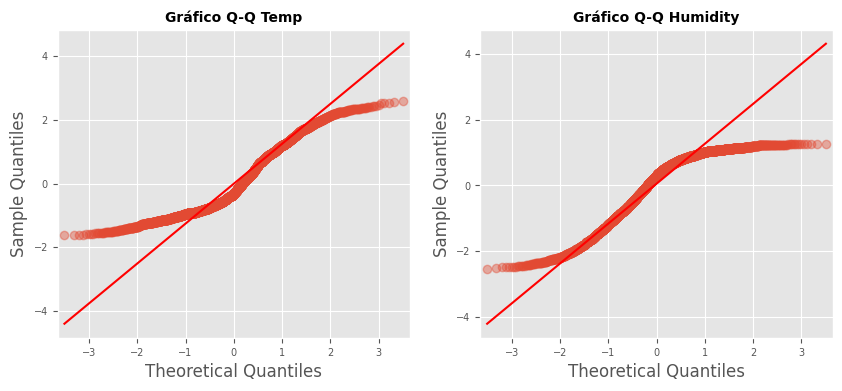

In [65]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

sm.qqplot(
    subdatos.TEMP,
    fit   = True,
    line  = 'q',
    alpha = 0.4,
    lw    = 2,
    ax    = axs[0]
)
axs[0].set_title('Gráfico Q-Q Temp', fontsize = 10, fontweight = "bold")
axs[0].tick_params(labelsize = 7)

sm.qqplot(
    subdatos.Humidity,
    fit   = True,
    line  = 'q',
    alpha = 0.4,
    lw    = 2,
    ax    = axs[1]
)
axs[1].set_title('Gráfico Q-Q Humidity', fontsize = 10, fontweight = "bold")
axs[1].tick_params(labelsize = 7)

In [70]:
display(pg.corr(subdatos['TEMP'], subdatos['Humidity'], method='spearman'))
display(pg.corr(subdatos['TEMP'], subdatos['Humidity'], method='kendall'))

,n,r,CI95%,p-val,power
spearman,4464,-0.916714,"[-0.92, -0.91]",0.0,1.0


,n,r,CI95%,p-val,power
kendall,4464,-0.759432,"[-0.77, -0.75]",0.0,1.0


Si vemos la correlacion obtenida (r) podemos darnos cuenta que estas columnas están fuertemente correlacionadas

Que el p-value sea igual a cero nos indica que nuestra hipótesis nula es falsa, nuestra hipótesis H_1, es que estas columnas esten relacionadas y para probar que es cierto debemos comprobar que lo contrario sea falso, esto es probar que las columnas no estan relacionadas.

In [73]:
corr_matrix = subdatos.corr(method='pearson')
corr_matrix

,TEMP,Humidity,Solar_rad,Bar_press.
TEMP,1.000000,-0.957730,0.743379,-0.387187
Humidity,-0.957730,1.000000,-0.765766,0.447845
Solar_rad,0.743379,-0.765766,1.000000,-0.093236
Bar_press.,-0.387187,0.447845,-0.093236,1.000000


In [76]:
def tidy_corr_matrix(corr_mat):
  
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['variable_1','variable_2','r']
    corr_mat = corr_mat.loc[corr_mat['variable_1'] != corr_mat['variable_2'], :]
    corr_mat['abs_r'] = np.abs(corr_mat['r'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)
    
    return(corr_mat)

tidy_corr_matrix(corr_matrix).head(10)

,variable_1,variable_2,r,abs_r
1,TEMP,Humidity,-0.957730,0.957730
4,Humidity,TEMP,-0.957730,0.957730
6,Humidity,Solar_rad,-0.765766,0.765766
9,Solar_rad,Humidity,-0.765766,0.765766
2,TEMP,Solar_rad,0.743379,0.743379
8,Solar_rad,TEMP,0.743379,0.743379
7,Humidity,Bar_press.,0.447845,0.447845
13,Bar_press.,Humidity,0.447845,0.447845
3,TEMP,Bar_press.,-0.387187,0.387187
12,Bar_press.,TEMP,-0.387187,0.387187


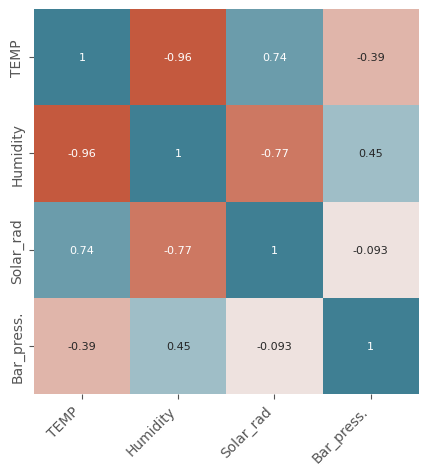

In [77]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))

sns.heatmap(
    corr_matrix,
    annot     = True,
    cbar      = False,
    annot_kws = {"size": 8},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = sns.diverging_palette(20, 220, n=200),
    square    = True,
    ax        = ax
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
)

ax.tick_params(labelsize = 10)